## Обработка изображений. Сверточные нейронные сети


In [ ]:
import torch
from torch import nn
from torch import optim

import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


### Классификация изображений

Ссылка на датасет на каггл: https://www.kaggle.com/datasets/ashfakyeafi/glasses-classification-dataset/data

Ссылка на датасет на google drive: https://drive.google.com/file/d/1iC5c4pJwk-Wb07mP-Qr2tjcvJuRCnoOs

In [ ]:
!wget 'https://drive.google.com/uc?id=1iC5c4pJwk-Wb07mP-Qr2tjcvJuRCnoOs' -O glasses.zip

--2024-10-22 10:58:50--  https://drive.google.com/uc?id=1iC5c4pJwk-Wb07mP-Qr2tjcvJuRCnoOs
Resolving drive.google.com (drive.google.com)... 74.125.20.113, 74.125.20.139, 74.125.20.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1iC5c4pJwk-Wb07mP-Qr2tjcvJuRCnoOs [following]
--2024-10-22 10:58:50--  https://drive.usercontent.google.com/download?id=1iC5c4pJwk-Wb07mP-Qr2tjcvJuRCnoOs
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.99.132, 2607:f8b0:400e:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.99.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 936892 (915K) [application/octet-stream]
Saving to: ‘glasses.zip’

glasses.zip         100%[===================>] 914.93K  --.-KB/s    in 0.01s   

2024-10-22 10:58:53 (86.2 MB/s) - ‘glas

In [ ]:
!unzip glasses.zip

Archive:  glasses.zip
   creating: train/
   creating: train/glasses/
  inflating: train/glasses/row-5-column-2.jpg  
  inflating: train/glasses/row-1-column-6.jpg  
  inflating: train/glasses/row-3-column-3.jpg  
  inflating: train/glasses/row-1-column-12.jpg  
  inflating: train/glasses/row-4-column-2.jpg  
  inflating: train/glasses/row-4-column-3.jpg  
  inflating: train/glasses/row-4-column-8.jpg  
  inflating: train/glasses/row-4-column-4.jpg  
  inflating: train/glasses/row-2-column-1.jpg  
  inflating: train/glasses/row-4-column-11.jpg  
  inflating: train/glasses/row-4-column-10.jpg  
  inflating: train/glasses/row-3-column-4.jpg  
  inflating: train/glasses/row-3-column-11.jpg  
  inflating: train/glasses/row-1-column-8.jpg  
  inflating: train/glasses/row-2-column-5.jpg  
  inflating: train/glasses/row-1-column-3.jpg  
  inflating: train/glasses/row-2-column-9.jpg  
  inflating: train/glasses/row-1-column-7.jpg  
  inflating: train/glasses/row-2-column-10.jpg  
  inflating: 

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms


img_size = 144
transform = transforms.Compose([
    # transforms.Resize((144, 144)),
    transforms.RandomCrop(img_size),
    transforms.RandomChoice([
        transforms.RandomPerspective(distortion_scale=0.2, p=1.0),
        transforms.RandomRotation(25),
    ]),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomAutocontrast(0.5),
    transforms.ToTensor()
])

In [ ]:
train_data = ImageFolder('/content/train', transform=transform)
test_data = ImageFolder('/content/validate', transform=transform)

classes = train_data.classes

batch_size = 32

train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=True)

In [ ]:
torch.manual_seed(1)
for data, y in train_loader:
    print(data.shape)
    print(y.shape)
    break

torch.Size([32, 3, 144, 144])
torch.Size([32])


noglasses


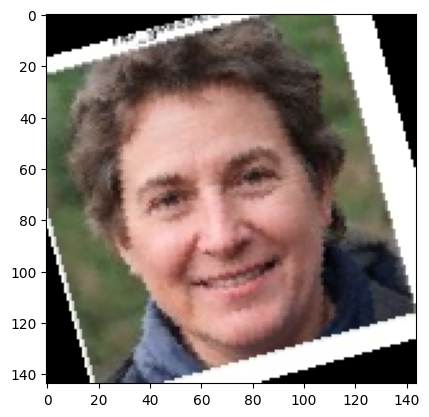

In [ ]:
import matplotlib.pyplot as plt


torch.manual_seed(1)
ind = 3
for data, y in train_loader:
    plt.imshow(data[ind].permute(1, 2, 0))
    print(classes[y[ind]])
    break

#### 🧠 Упражнение. Подготовка сети

- Постройте сеть с двумя сверточными слоями
- С MaxPooling'ом после сверточных слоев
- Со слоем Flatten перед двумя полносвязными слоями
- С функцией активации ReLU на промежуточных слоях

In [ ]:
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        torch.manual_seed(1)
        self.conv1 = ...
        self.conv2 = ...
        self.pool = ...
        self.relu = ...
        self.flat = ...
        self.fc1 = ...
        self.fc2 = ...

    def forward(self, x):
        x = ...
        x = ...
        x = ...
        x = ...
        x = ...
        return x



net = Net(img_size * img_size * 3, len(classes))
net = net.to(device)
net

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=20736, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

##### 🧠 Упражнение (ответ). Подготовка сети

In [ ]:
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        torch.manual_seed(1)
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(20736, 512)
        self.fc2 = nn.Linear(512, output_dim)

    def forward(self, x):
        x = self.relu(self.pool(self.conv1(x)))
        x = self.relu(self.pool(self.conv2(x)))
        x = self.flat(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x



net = Net(img_size * img_size * 3, len(classes))
net = net.to(device)
net

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=20736, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)

In [ ]:
import torchsummary

torchsummary.summary(net, (3, img_size, img_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 144, 144]             224
         MaxPool2d-2            [-1, 8, 72, 72]               0
              ReLU-3            [-1, 8, 72, 72]               0
            Conv2d-4           [-1, 16, 72, 72]           1,168
         MaxPool2d-5           [-1, 16, 36, 36]               0
              ReLU-6           [-1, 16, 36, 36]               0
           Flatten-7                [-1, 20736]               0
            Linear-8                  [-1, 512]      10,617,344
              ReLU-9                  [-1, 512]               0
           Linear-10                    [-1, 2]           1,026
Total params: 10,619,762
Trainable params: 10,619,762
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.24
Forward/backward pass size (MB): 3.01
Params size (MB): 40.51
Esti

#### Обучение модели

In [ ]:
example = data[:1].to(device)
example.shape

torch.Size([1, 3, 144, 144])

In [ ]:
pred = net(example)
pred

tensor([[-0.0102,  0.0360]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
def plot_learning_curves(history):
    fig = plt.figure(figsize=(20, 7))

    plt.subplot(1,2,1)
    plt.title('Loss', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    plt.plot(history['loss']['test'], label='test')
    plt.ylabel('Loss', fontsize=15)
    plt.xlabel('Epoch', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Точность', fontsize=15)
    plt.plot(history['acc']['train'], label='train')
    plt.plot(history['acc']['test'], label='test')
    plt.ylabel('Loss', fontsize=15)
    plt.xlabel('Epoch', fontsize=15)
    plt.legend()
    plt.show()

In [ ]:
from IPython.display import clear_output

def train(model, crit, optim,
          train_loader, test_loader,
          num_epochs=10,
          plot=False):

    history = {'loss': {'train': [], 'test': []},
               'acc': {'train': [], 'test': []}}

    for epoch in range(num_epochs):
        train_loss = 0
        train_items, train_correct = 0, 0
        val_loss = 0
        val_items, val_correct = 0, 0

        # на каждой "эпохе" делаем полный проход по данным
        for i, data in enumerate(train_loader):
            inputs, labels = data[0].to(device), data[1].to(device)
            optim.zero_grad()

            outputs = model(inputs)

            loss = crit(outputs, labels)

            loss.backward()
            optim.step()


            train_loss += np.sum(loss.detach().cpu().numpy())
            _, y_pred = torch.max(outputs, 1)
            train_items += len(labels)
            train_correct += (y_pred == labels).sum().item()

        # подсчитываем лоссы и сохраням в "историю"
        train_loss /= len(train_loader)
        train_acc = train_correct / train_items
        history['loss']['train'].append(train_loss)
        history['acc']['train'].append(train_acc)

        # полностью проходим по валидационному датасету
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            outputs = model(X_batch)
            loss = crit(outputs, y_batch)
            val_loss += np.sum(loss.detach().cpu().numpy())
            _, y_pred = torch.max(outputs, 1)
            val_items += len(y_batch)
            val_correct += (y_pred == y_batch).sum().item()

        # подсчитываем лоссы и сохраням в "историю"
        val_loss /= len(test_loader)
        val_acc = val_correct / val_items
        history['loss']['test'].append(val_loss)
        history['acc']['test'].append(val_acc)

        if plot:
            clear_output()
            plot_learning_curves(history)

        if epoch % 10 == 0:
            print(f"Epoch {epoch + 1} of {num_epochs}")
            print(f"  train loss: {train_loss:.3f}" \
                  f"  test loss: {val_loss:.3f}"  \
                  f"  train acc: {train_acc * 100:.2f}%" \
                  f"  test acc: {val_acc * 100:.2f}%")


    return model, history

Epoch 1 of 100
  train loss: 1.714  test loss: 1.599  train acc: 53.85%  test acc: 50.00%
Epoch 11 of 100
  train loss: 0.657  test loss: 0.684  train acc: 70.19%  test acc: 57.50%
Epoch 21 of 100
  train loss: 0.474  test loss: 0.861  train acc: 78.85%  test acc: 52.50%
Epoch 31 of 100
  train loss: 0.430  test loss: 0.548  train acc: 77.88%  test acc: 72.50%
Epoch 41 of 100
  train loss: 0.476  test loss: 0.638  train acc: 77.88%  test acc: 67.50%
Epoch 51 of 100
  train loss: 0.320  test loss: 0.605  train acc: 79.81%  test acc: 62.50%
Epoch 61 of 100
  train loss: 0.337  test loss: 0.437  train acc: 85.58%  test acc: 75.00%
Epoch 71 of 100
  train loss: 0.344  test loss: 0.347  train acc: 86.54%  test acc: 85.00%
Epoch 81 of 100
  train loss: 0.216  test loss: 0.354  train acc: 93.27%  test acc: 85.00%
Epoch 91 of 100
  train loss: 0.209  test loss: 0.358  train acc: 90.38%  test acc: 90.00%


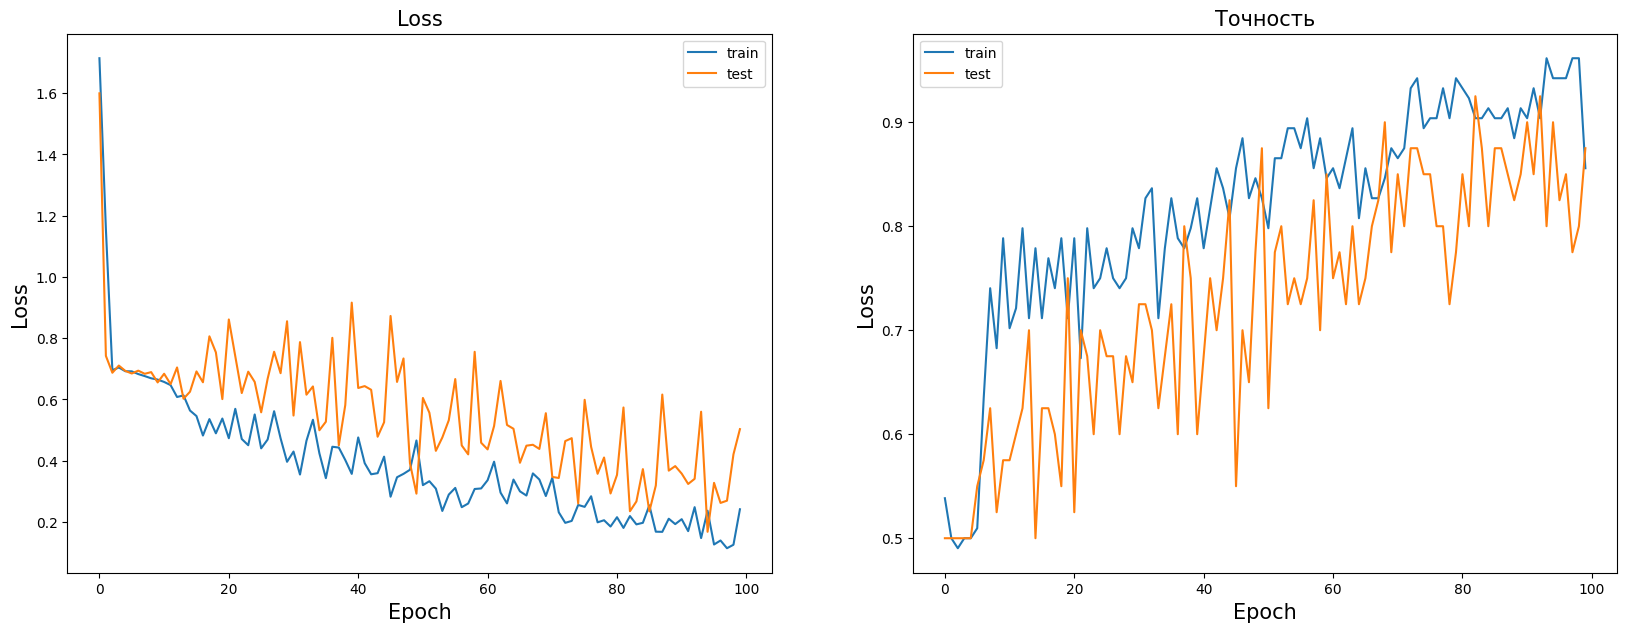

CPU times: user 31.9 s, sys: 523 ms, total: 32.5 s
Wall time: 34.6 s


In [ ]:
%%time
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

net, history = train(
    net, criterion, optimizer,
    train_loader, test_loader,
    num_epochs=100
)

plot_learning_curves(history)

In [ ]:
PATH_MODEL = 'net.pth'
torch.save(net, PATH_MODEL)

#### Уменьшение количества параметров сети

In [ ]:
class Net(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        torch.manual_seed(1)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()

        # self.flat = nn.Flatten()
        self.flat = nn.AdaptiveAvgPool2d(1)

        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = self.relu(self.pool(self.conv1(x)))
        x = self.relu(self.pool(self.conv2(x)))
        x = self.relu(self.pool(self.conv3(x)))
        x = self.flat(x).squeeze(3).squeeze(2)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x



net = Net(img_size * img_size * 3, len(classes))
net = net.to(device)
net

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (flat): AdaptiveAvgPool2d(output_size=1)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
import torchsummary

torchsummary.summary(net, (3, img_size, img_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 144, 144]             448
         MaxPool2d-2           [-1, 16, 72, 72]               0
              ReLU-3           [-1, 16, 72, 72]               0
            Conv2d-4           [-1, 64, 72, 72]           9,280
         MaxPool2d-5           [-1, 64, 36, 36]               0
              ReLU-6           [-1, 64, 36, 36]               0
            Conv2d-7          [-1, 128, 36, 36]          73,856
         MaxPool2d-8          [-1, 128, 18, 18]               0
              ReLU-9          [-1, 128, 18, 18]               0
AdaptiveAvgPool2d-10            [-1, 128, 1, 1]               0
           Linear-11                   [-1, 64]           8,256
             ReLU-12                   [-1, 64]               0
           Linear-13                    [-1, 2]             130
Total params: 91,970
Trainable params: 

Epoch 1 of 100
  train loss: 0.700  test loss: 0.695  train acc: 50.00%  test acc: 50.00%
Epoch 11 of 100
  train loss: 0.693  test loss: 0.693  train acc: 50.00%  test acc: 50.00%
Epoch 21 of 100
  train loss: 0.688  test loss: 0.694  train acc: 50.00%  test acc: 50.00%
Epoch 31 of 100
  train loss: 0.682  test loss: 0.703  train acc: 63.46%  test acc: 55.00%
Epoch 41 of 100
  train loss: 0.665  test loss: 0.722  train acc: 69.23%  test acc: 52.50%
Epoch 51 of 100
  train loss: 0.530  test loss: 0.796  train acc: 75.96%  test acc: 62.50%
Epoch 61 of 100
  train loss: 0.573  test loss: 0.752  train acc: 72.12%  test acc: 47.50%
Epoch 71 of 100
  train loss: 0.576  test loss: 0.708  train acc: 62.50%  test acc: 60.00%
Epoch 81 of 100
  train loss: 0.545  test loss: 0.754  train acc: 70.19%  test acc: 65.00%
Epoch 91 of 100
  train loss: 0.560  test loss: 0.556  train acc: 72.12%  test acc: 70.00%


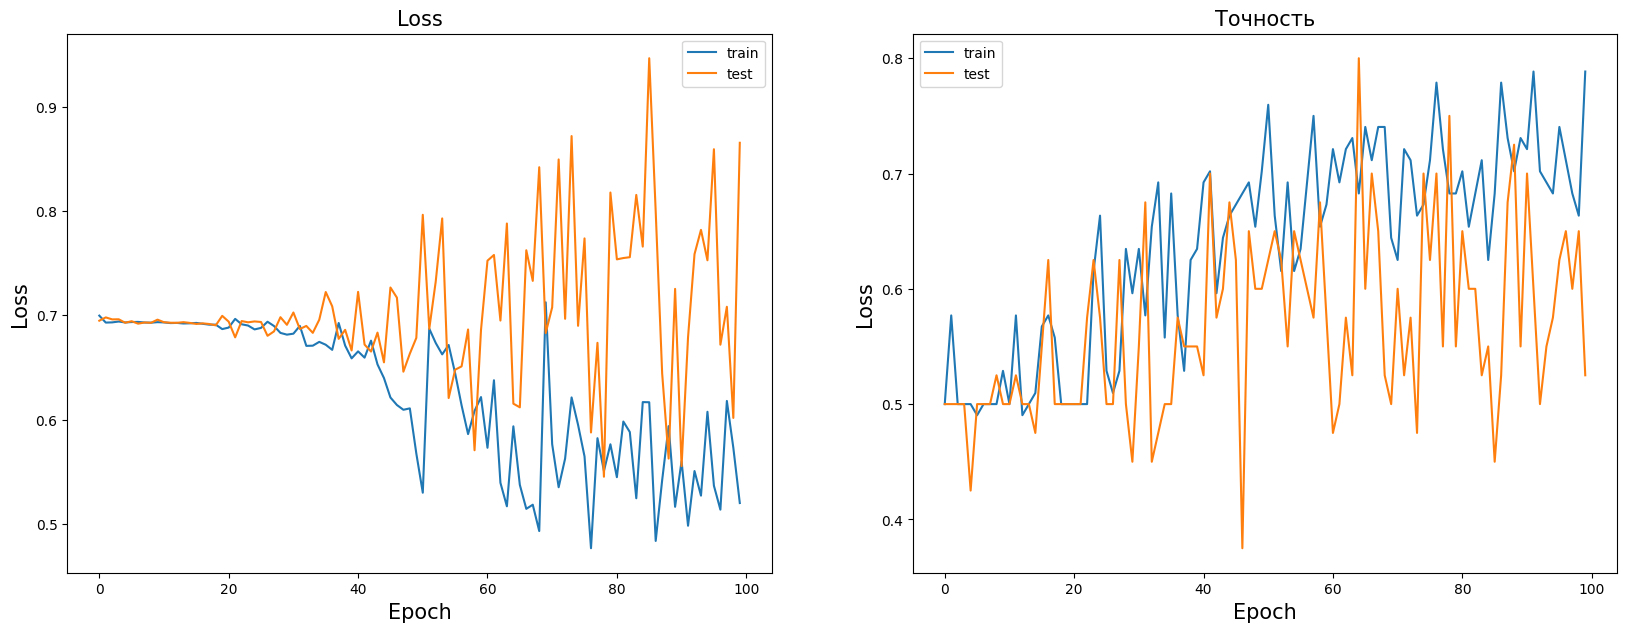

CPU times: user 35.2 s, sys: 552 ms, total: 35.8 s
Wall time: 35.8 s


In [ ]:
%%time
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

net, history = train(
    net, criterion, optimizer,
    train_loader, test_loader,
    num_epochs=100
)

plot_learning_curves(history)

In [ ]:
PATH_MODEL = 'net_light.pth'
torch.save(net, PATH_MODEL)

In [ ]:
!ls -hs

Usage: ls [OPTION]... [FILE]...
List information about the FILEs (the current directory by default).
Sort entries alphabetically if none of -cftuvSUX nor --sort is specified.

Mandatory arguments to long options are mandatory for short options too.
  -a, --all                  do not ignore entries starting with .
  -A, --almost-all           do not list implied . and ..
      --author               with -l, print the author of each file
  -b, --escape               print C-style escapes for nongraphic characters
      --block-size=SIZE      with -l, scale sizes by SIZE when printing them;
                               e.g., '--block-size=M'; see SIZE format below
  -B, --ignore-backups       do not list implied entries ending with ~
  -c                         with -lt: sort by, and show, ctime (time of last
                               modification of file status information);
                               with -l: show ctime and sort by name;
                               othe

### Использование предобученных моделей

In [ ]:
import torchvision as tv

model = tv.models.resnet18(pretrained=True)
model = model.to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
torchsummary.summary(model.to(device), input_size=(3, img_size, img_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
for param in model.parameters():
    # param.requires_grad = False
    param.requires_grad = True

In [ ]:
model.fc

Linear(in_features=512, out_features=2, bias=True)

In [ ]:
torch.manual_seed(1)
model.fc = nn.Linear(in_features=512, out_features=len(classes))

In [ ]:
print("Params to learn:")
params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.b

In [ ]:
optimizer = torch.optim.Adam(params_to_update, lr=0.001)

Epoch 1 of 20
  train loss: 0.588  test loss: 0.983  train acc: 67.31%  test acc: 82.50%
Epoch 11 of 20
  train loss: 0.002  test loss: 0.137  train acc: 100.00%  test acc: 97.50%


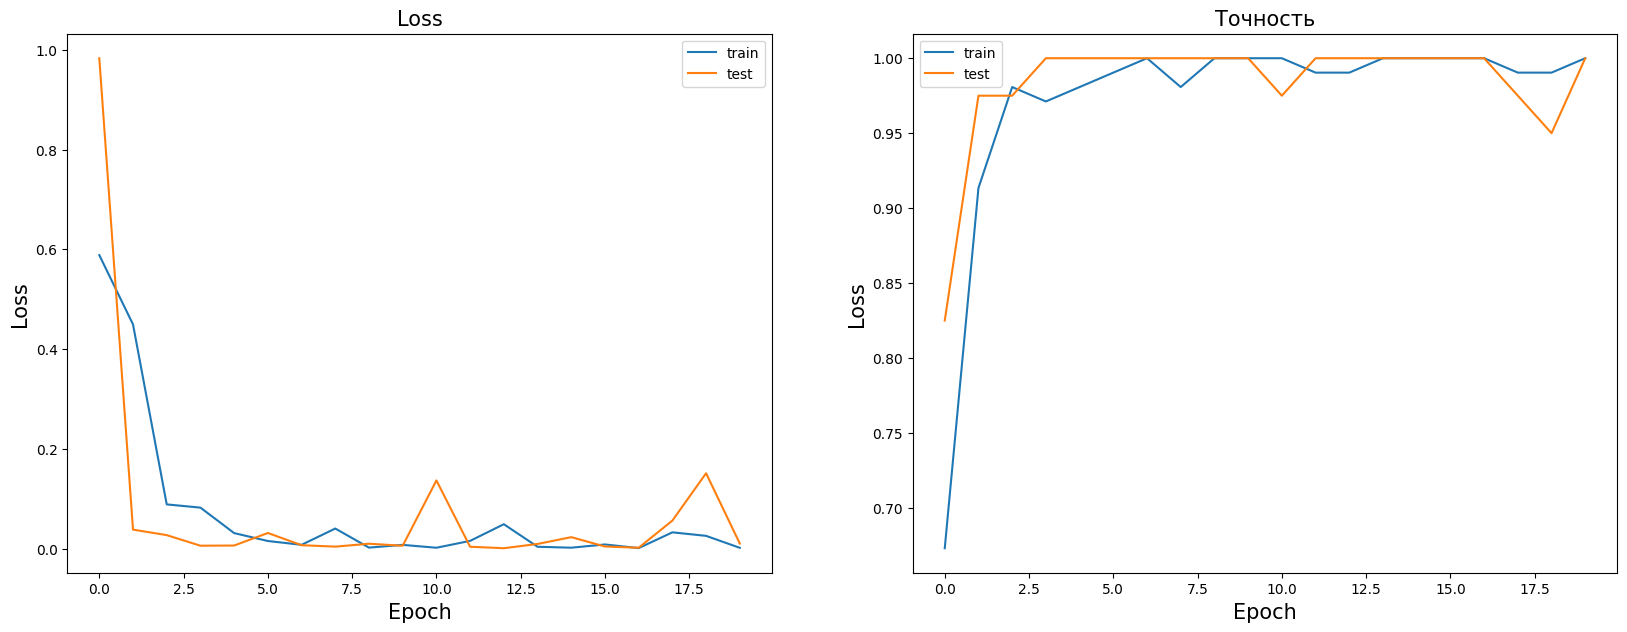

CPU times: user 9.07 s, sys: 226 ms, total: 9.3 s
Wall time: 9.34 s


In [ ]:
%%time
criterion = nn.CrossEntropyLoss()

model, history = train(
    model.to(device), criterion, optimizer,
    train_loader, test_loader,
    # num_epochs=100
    num_epochs=20
)

plot_learning_curves(history)

In [ ]:
PATH_MODEL = 'net_pretrained.pth'
torch.save(model, PATH_MODEL)

In [ ]:
!ls -hs

total 85M
916K glasses.zip     43M net_pretrained.pth  4.0K sample_data  4.0K validate
368K net_light.pth   41M net.pth	     4.0K train


#### 🧠 Упражнение. Дообучение предобученной модели

In [ ]:
tv.models.list_models(tv.models)

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'googlenet',
 'inception_v3',
 'maxvit_t',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1_6gf',
 'regnet_y_32gf',
 'regnet_y_3_2gf',
 'regnet_y_400mf',
 'regnet_y_800mf',
 'regnet_y_8gf',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext101_64x4d',
 'resnext50_32x4d',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'sh

1. Загрузите модель `mobilenet_v2`

2. Поменяйте последний полносвязный слой на новый

3. Обучите нейросеть

4. Сохраните нейросеть на диск

##### 🧠 Упражнение. Дообучение предобученной модели (ответ)

1. Загрузите модель `mobilenet_v2`

In [ ]:
import torchvision as tv

model = tv.models.mobilenet_v2(pretrained=True)
model = model.to(device)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 128MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
torchsummary.summary(model.to(device), input_size=(3, img_size, img_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 72, 72]             864
       BatchNorm2d-2           [-1, 32, 72, 72]              64
             ReLU6-3           [-1, 32, 72, 72]               0
            Conv2d-4           [-1, 32, 72, 72]             288
       BatchNorm2d-5           [-1, 32, 72, 72]              64
             ReLU6-6           [-1, 32, 72, 72]               0
            Conv2d-7           [-1, 16, 72, 72]             512
       BatchNorm2d-8           [-1, 16, 72, 72]              32
  InvertedResidual-9           [-1, 16, 72, 72]               0
           Conv2d-10           [-1, 96, 72, 72]           1,536
      BatchNorm2d-11           [-1, 96, 72, 72]             192
            ReLU6-12           [-1, 96, 72, 72]               0
           Conv2d-13           [-1, 96, 36, 36]             864
      BatchNorm2d-14           [-1, 96,

2. Поменяйте последний полносвязный слой на новый

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
model.classifier[1]

Linear(in_features=1280, out_features=1000, bias=True)

In [ ]:
model.classifier[1] = nn.Linear(in_features=1280, out_features=len(classes))

In [ ]:
print("Params to learn:")
params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)

Params to learn:
	 classifier.1.weight
	 classifier.1.bias


3. Обучите нейросеть

Epoch 1 of 100
  train loss: 0.701  test loss: 0.487  train acc: 53.85%  test acc: 80.00%
Epoch 11 of 100
  train loss: 0.208  test loss: 0.264  train acc: 91.35%  test acc: 92.50%
Epoch 21 of 100
  train loss: 0.168  test loss: 0.304  train acc: 96.15%  test acc: 95.00%
Epoch 31 of 100
  train loss: 0.148  test loss: 0.173  train acc: 96.15%  test acc: 92.50%
Epoch 41 of 100
  train loss: 0.143  test loss: 0.299  train acc: 96.15%  test acc: 85.00%
Epoch 51 of 100
  train loss: 0.139  test loss: 0.271  train acc: 96.15%  test acc: 90.00%
Epoch 61 of 100
  train loss: 0.065  test loss: 0.123  train acc: 100.00%  test acc: 92.50%
Epoch 71 of 100
  train loss: 0.086  test loss: 0.132  train acc: 96.15%  test acc: 95.00%
Epoch 81 of 100
  train loss: 0.093  test loss: 0.113  train acc: 97.12%  test acc: 95.00%
Epoch 91 of 100
  train loss: 0.068  test loss: 0.131  train acc: 98.08%  test acc: 95.00%


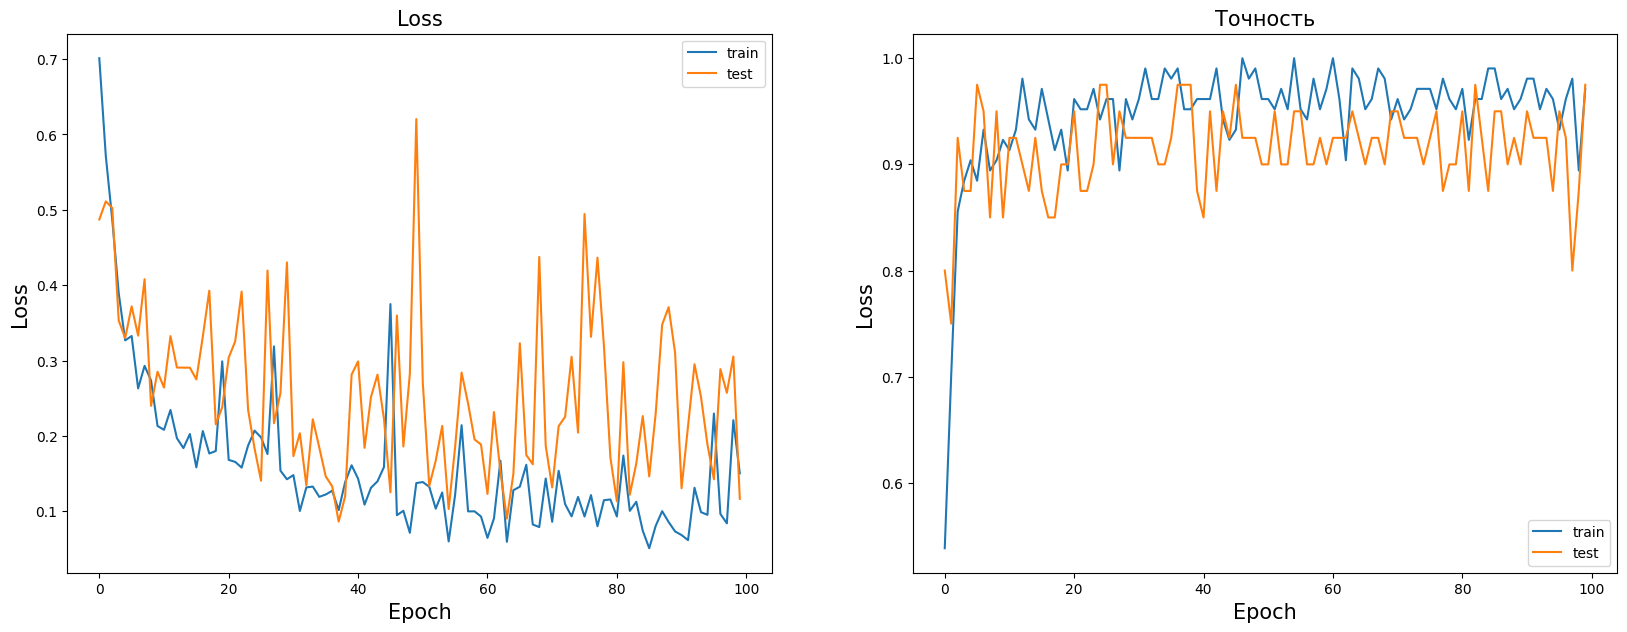

CPU times: user 37.1 s, sys: 563 ms, total: 37.7 s
Wall time: 40.8 s


In [ ]:
%%time
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params_to_update, lr=0.001)

model, history = train(
    model.to(device), criterion, optimizer,
    train_loader, test_loader,
    num_epochs=100
)

plot_learning_curves(history)

4. Сохраните нейросеть на диск

In [ ]:
torch.save(model, 'mobilenet.pth')

In [ ]:
ls -hs

total 94M
916K glasses.zip    368K net_light.pth        41M net.pth       4.0K train/
8.8M mobilenet.pth   43M net_pretrained.pth  4.0K sample_data/  4.0K validate/


### Albumentations

https://albumentations.ai/

In [ ]:
import albumentations as alb
import numpy as np


alb_transform = alb.Compose(
    [
        alb.Resize(height=256, width=256),
        alb.RandomCrop(height=224, width=224),
        alb.HorizontalFlip(p=0.5),
        alb.SmallestMaxSize(max_size=160),
        alb.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=1),
        alb.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        alb.RandomBrightnessContrast(p=0.5),
        alb.OneOf([
            alb.MotionBlur(p=1),
            alb.OpticalDistortion(p=1),
            alb.GaussNoise(p=1)
        ], p=1),
        alb.Normalize(mean=(0.485, 0.456, 0.406),
                      std=(0.229, 0.224, 0.225)),
        # ToTensor(),
    ]
)

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


torch.manual_seed(0)


orig_img = Image.open('/content/train/glasses/row-1-column-1.jpg')
plt.imshow(orig_img)

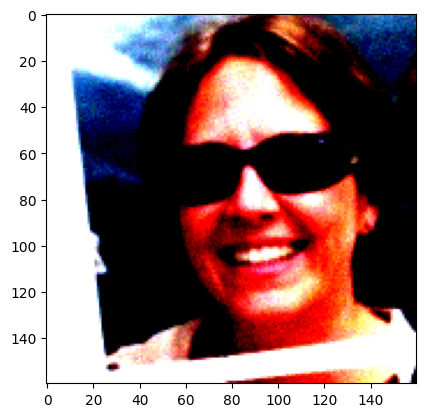

In [ ]:
alb_img = alb_transform(image=np.array(orig_img))['image']
plt.imshow(alb_img)

## Дополнительные материалы
1. torchvision https://pytorch.org/vision/stable/index.html
2. albumentations https://albumentations.ai/
